In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  
import matplotlib.pyplot as plt

In [28]:
# Cargar el archivo CSV
df = pd.read_csv('datos_ventas.csv') 

In [29]:
# Definir variables predictoras (X) y variable objetivo (y)
X = df[['precio_unitario', 'descuento', 'publicidad']]
y = df['piezas_vendidas']

In [30]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Crear y entrenar el modelo de Random Forest
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

In [33]:
# Evaluar el modelo  
mae = mean_absolute_error(y_test, y_pred)  
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
r2 = r2_score(y_test, y_pred)  

print(f'MAE: {mae:.2f}')  
print(f'RMSE: {rmse:.2f}')  
print(f'R²: {r2:.2f}')  

MAE: 0.11
RMSE: 0.15
R²: 1.00


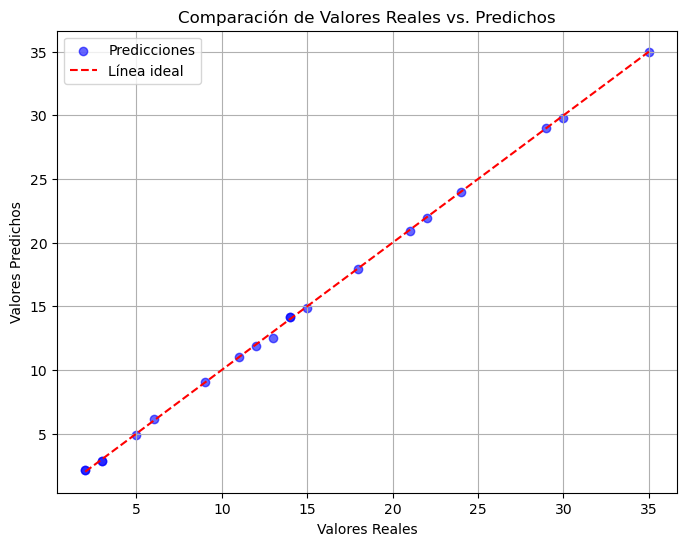

In [34]:
# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, label="Predicciones")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],  # Línea ideal
         linestyle="--", color="red", label="Línea ideal")

# Etiquetas y título
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación de Valores Reales vs. Predichos")
plt.legend()
plt.grid(True)
plt.show()


In [35]:
# Guardamos el modelo
import joblib
joblib.dump(modelo, 'modelo_piezas_venta.pkl')

['modelo_piezas_venta.pkl']

In [36]:
import joblib

# Cargar el modelo que guardamos previamente
modelo = joblib.load('modelo_piezas_venta.pkl')

In [37]:
# Cargar datos nuevos para predecir las piezas que se venderán
datos_futuros = pd.read_csv('datos_proyectados.csv')

In [38]:
# Realizar predicciones
predicciones_futuras = modelo.predict(datos_futuros)

# Crear DataFrame con los resultados
resultados_futuros = datos_futuros.copy()
resultados_futuros['piezas_vendidas_predichas'] = predicciones_futuras

print("\nPredicciones de ventas futuras:")
print(resultados_futuros)


Predicciones de ventas futuras:
   precio_unitario  descuento  publicidad  piezas_vendidas_predichas
0               24         12        1200                      22.72
1               23         10        1100                      20.17
2               25         15        1300                      27.05
3               22          8        1000                      17.16
4               26         10        1400                      26.88
5               27         12        1500                      26.98
6               24         10        1300                      25.49
7               23          8        1200                      22.27
8               24         10        1400                      25.49
9               25         12        1500                      27.42


In [39]:
 # Guardar los resultados en un archivo CSV
resultados_futuros.to_csv('predicciones_futuras_completo.csv', index=False)
print("Predicciones guardadas en 'predicciones_futuras_completo.csv'")

Predicciones guardadas en 'predicciones_futuras_completo.csv'
